In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


%matplotlib inline
plt.rcParams.update({'font.size':14})

In [ ]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train accuracy_score:\t" + str(round(accuracy_score(train_true_values,  train_pred_values), 3)))
    print("Test accuracy_score:\t" + str(round(accuracy_score(test_true_values,  test_pred_values), 3)))

    # plt.figure(figsize = (18, 10))

    # plt.subplot(121)
    # sns.scatterplot(x = train_pred_values, y = train_true_values)
    # plt.xlabel('Predicted values')
    # plt.ylabel('True values')
    # plt.title('Train sample prediction')

    # plt.subplot(122)
    # sns.scatterplot(x = test_pred_values, y = test_true_values)
    # plt.xlabel('Predicted values')
    # plt.ylabel('True values')
    # plt.title('Test sample prediction')

    # plt.show()

In [ ]:
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/train.csv', sep = ',')
train_df.tail(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
train_df.shape

(8693, 14)

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/spaceship-titanic/test.csv', sep = ',')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_df.shape

(4277, 13)

In [ ]:
sample_submission=pd.read_csv('/content/drive/MyDrive/spaceship-titanic/sample_submission.csv', sep = ',')
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
sample_submission.shape

(4277, 2)

In [ ]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [ ]:
sample_submission.nunique()

PassengerId    4277
Transported       1
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

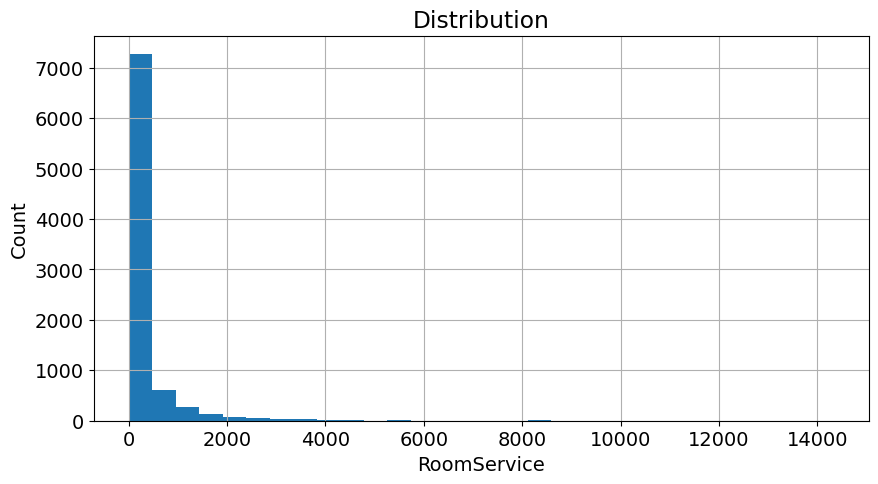

In [ ]:
plt.figure(figsize = (10, 5))

train_df['RoomService'].hist(bins = 30)
plt.ylabel('Count')
plt.xlabel('RoomService')

plt.title('Distribution')
plt.show

<Axes: >

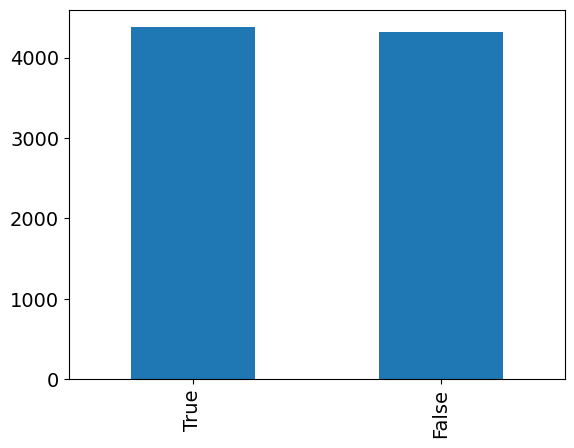

In [ ]:
plot_df = train_df.Transported.value_counts()
plot_df.plot(kind="bar")

In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
train_df.select_dtypes(include='object').columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [ ]:
test_df.select_dtypes(include='object').columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [ ]:
train_df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
test_df['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [ ]:
train_df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
test_df['CryoSleep'].value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [ ]:
train_df['Cabin'].value_counts().head()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
Name: Cabin, dtype: int64

In [ ]:
test_df['Cabin'].value_counts().head()

G/160/P    8
D/273/S    7
B/31/P     7
G/748/S    7
E/228/S    7
Name: Cabin, dtype: int64

In [ ]:
test_df['Cabin'].nunique()

3265

In [ ]:
train_df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
test_df['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [ ]:
train_df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [ ]:
test_df['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [ ]:
(len(train_df) - train_df.count())/len(train_df)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [ ]:
(len(test_df) - test_df.count())/len(test_df)

PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64

In [ ]:
train_df[train_df['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [ ]:
train_df['HomePlanet'].mode()

0    Earth
Name: HomePlanet, dtype: object

In [ ]:
train_df['HomePlanet']=train_df['HomePlanet'].fillna('Earth')

In [ ]:
train_df['CryoSleep'].mode()

0    False
Name: CryoSleep, dtype: object

In [ ]:
train_df['CryoSleep']=train_df['CryoSleep'].fillna('False')

In [ ]:
train_df['Destination'].mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [ ]:
train_df['Destination']=train_df['Destination'].fillna('TRAPPIST-1e')

In [ ]:
train_df.loc[train_df['Age'].isnull(), 'Age'] = train_df['Age'].median()

In [ ]:
train_df['VIP'].mode()

0    False
Name: VIP, dtype: object

In [ ]:
train_df['VIP']=train_df['VIP'].fillna('False')

In [ ]:
train_df.loc[train_df['RoomService'].isnull(), 'RoomService'] = train_df['RoomService'].median()

In [ ]:
train_df.loc[train_df['FoodCourt'].isnull(), 'FoodCourt'] = train_df['FoodCourt'].median()

In [ ]:
train_df.loc[train_df['ShoppingMall'].isnull(), 'ShoppingMall'] = train_df['ShoppingMall'].median()

In [ ]:
train_df.loc[train_df['Spa'].isnull(), 'Spa'] = train_df['Spa'].median()

In [ ]:
train_df.loc[train_df['VRDeck'].isnull(), 'VRDeck'] = train_df['VRDeck'].median()

In [ ]:
train_df['Cabin'].mode()

0    G/734/S
Name: Cabin, dtype: object

In [ ]:
(len(train_df) - train_df.count())/len(train_df)

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.022892
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            0.023007
Transported     0.000000
dtype: float64

In [ ]:
test_df['HomePlanet'].mode()

0    Earth
Name: HomePlanet, dtype: object

In [ ]:
test_df['HomePlanet']=test_df['HomePlanet'].fillna('Earth')

In [ ]:
test_df['CryoSleep'].mode()

0    False
Name: CryoSleep, dtype: object

In [ ]:
test_df['CryoSleep']=test_df['CryoSleep'].fillna('False')

In [ ]:
test_df['Destination'].mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [ ]:
test_df['Destination']=test_df['Destination'].fillna('TRAPPIST-1e')

In [ ]:
test_df.loc[test_df['Age'].isnull(), 'Age'] = test_df['Age'].median()

In [ ]:
test_df['VIP'].mode()

0    False
Name: VIP, dtype: object

In [ ]:
test_df['VIP']=test_df['VIP'].fillna('False')

In [ ]:
test_df.loc[test_df['RoomService'].isnull(), 'RoomService'] = test_df['RoomService'].median()

In [ ]:
test_df.loc[test_df['FoodCourt'].isnull(), 'FoodCourt'] = test_df['FoodCourt'].median()

In [ ]:
test_df.loc[test_df['ShoppingMall'].isnull(), 'ShoppingMall'] = test_df['ShoppingMall'].median()

In [ ]:
test_df.loc[test_df['Spa'].isnull(), 'Spa'] = test_df['Spa'].median()

In [ ]:
test_df.loc[test_df['VRDeck'].isnull(), 'VRDeck'] = test_df['VRDeck'].median()

In [ ]:
(len(test_df) - test_df.count())/len(test_df)

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.023381
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            0.021978
dtype: float64

In [ ]:
train_df['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
# train_df['HomePlanet'] = train_df['HomePlanet'].replace({'Earth':0, 'Europa':1, 'Mars':2})
# train_df['CryoSleep'] = train_df['CryoSleep'].replace({'False':0, 'True':1})
# train_df['Destination'] = train_df['Destination'].replace({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})
# train_df['VIP']=train_df['VIP'].replace({'False':0, 'True':1})

In [ ]:
train_df=pd.get_dummies(train_df, columns=['HomePlanet','CryoSleep', 'Destination', 'VIP'])


In [ ]:
train_df.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,CryoSleep_False,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,VIP_False
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,...,0,1,0,0,0,0,1,1,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,...,0,1,0,0,0,0,1,1,0,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,...,0,1,0,0,0,0,1,0,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,...,0,1,0,0,0,0,1,1,0,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,...,0,1,0,0,0,0,1,1,0,0


In [ ]:
# test_df['HomePlanet'] = test_df['HomePlanet'].replace({'Earth':0, 'Europa':1, 'Mars':2})
# test_df['CryoSleep'] = test_df['CryoSleep'].replace({'False':0, 'True':1})
# test_df['Destination'] = test_df['Destination'].replace({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})
# test_df['VIP']=test_df['VIP'].replace({'False':0, 'True':1})

In [ ]:
test_df=pd.get_dummies(test_df, columns=['HomePlanet','CryoSleep', 'Destination', 'VIP'])

In [ ]:
train_df['FoodCourt']=(train_df['FoodCourt']-train_df['FoodCourt'].min())/(train_df['FoodCourt'].max()-train_df['FoodCourt'].min())
train_df['RoomService']=(train_df['RoomService']-train_df['RoomService'].min())/(train_df['RoomService'].max()-train_df['RoomService'].min())
train_df['ShoppingMall']=(train_df['ShoppingMall']-train_df['ShoppingMall'].min())/(train_df['ShoppingMall'].max()-train_df['ShoppingMall'].min())
train_df['Spa']=(train_df['Spa']-train_df['Spa'].min())/(train_df['Spa'].max()-train_df['Spa'].min())
train_df['VRDeck']=(train_df['VRDeck']-train_df['VRDeck'].min())/(train_df['VRDeck'].max()-train_df['VRDeck'].min())

In [ ]:
test_df['FoodCourt']=(test_df['FoodCourt']-test_df['FoodCourt'].min())/(test_df['FoodCourt'].max()-test_df['FoodCourt'].min())
test_df['RoomService']=(test_df['RoomService']-test_df['RoomService'].min())/(test_df['RoomService'].max()-test_df['RoomService'].min())
test_df['ShoppingMall']=(test_df['ShoppingMall']-test_df['ShoppingMall'].min())/(test_df['ShoppingMall'].max()-test_df['ShoppingMall'].min())
test_df['Spa']=(test_df['Spa']-test_df['Spa'].min())/(test_df['Spa'].max()-test_df['Spa'].min())
test_df['VRDeck']=(test_df['VRDeck']-test_df['VRDeck'].min())/(test_df['VRDeck'].max()-test_df['VRDeck'].min())

In [ ]:
train_df.columns.tolist()

['PassengerId',
 'Cabin',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_False',
 'CryoSleep_True',
 'CryoSleep_False',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_False',
 'VIP_True',
 'VIP_False']

In [ ]:
feature_names = ['HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep_False','CryoSleep_True','Destination_55 Cancri e','Destination_PSO J318.5-22','Destination_TRAPPIST-1e','Age','VIP_False','VIP_True','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
target_name = 'Transported'

In [ ]:
test_df.columns.tolist()

['PassengerId',
 'Cabin',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_False',
 'CryoSleep_True',
 'CryoSleep_False',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_False',
 'VIP_True',
 'VIP_False']

In [ ]:
feature_names_ = ['HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep_False','CryoSleep_True','Destination_55 Cancri e','Destination_PSO J318.5-22','Destination_TRAPPIST-1e','Age','VIP_False','VIP_True','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [ ]:
X = train_df[feature_names]
y = train_df[target_name]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True, random_state = 21)

In [ ]:
parameters = {
    'n_estimators': [150, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

rf_model = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
)

In [ ]:
#rf_model = RandomForestClassifier(random_state = 21)
rf_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([5, 6, 7, 8]),
                         'n_estimators': [150, 200, 250]},
             scoring='accuracy')

In [ ]:
rf_model.best_params_

{'max_depth': 7, 'max_features': 7, 'n_estimators': 200}

In [ ]:
cv_results = pd.DataFrame(rf_model.cv_results_)

cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score', 'mean_train_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

In [ ]:
rf_model=RandomForestClassifier(n_estimators=200, max_depth=7, max_features=7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=7, n_estimators=200)

In [ ]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)
evaluate_preds (y_train, y_train_preds, y_test, y_test_preds)

Train accuracy_score:	0.822
Test accuracy_score:	0.798


In [ ]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),
                                  columns=['feature_name', 'importance'])

feature_importances.sort_values(by = 'importance', ascending = False)

,feature_name,importance
5,CryoSleep_True,0.213430
3,CryoSleep_False,0.157242
16,Spa,0.125433
13,RoomService,0.100053
17,VRDeck,0.095263
14,FoodCourt,0.089159
9,Age,0.057414
15,ShoppingMall,0.052981
0,HomePlanet_Earth,0.052265
1,HomePlanet_Europa,0.026907


In [ ]:
forecast = rf_model.predict(test_df[feature_names_])

In [ ]:
my_forecast = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': forecast.flatten()}, columns = ['PassengerId', 'Transported'])

In [ ]:
my_forecast.head(10)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


In [ ]:
my_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [ ]:
my_forecast.shape

(4277, 2)

In [ ]:
Predictions_titanic = 'Predictions_titanic.csv'

In [ ]:
my_forecast.to_csv(Predictions_titanic, sep = ',', index = False, encoding = 'utf-8')